# Qnumerics Mitiq coding challenge

Welcome to the Mitiq coding challenge.
This notebook is designed to get you familiar with some of the tools that Mitiq can offer.
While Mitiq is predominantly a tool for error mitigation (and these challenges will show you that), it also has lots of other helpful tools which you can use to help other challenges you may face when programming quantum devices.

Almost all of the challenges will require you to peruse Mitiq's [API-doc](https://mitiq.readthedocs.io/en/stable/apidoc.html) or [Users Guide](https://mitiq.readthedocs.io/en/stable/guide/guide.html) and most solutions require a single call to a function in Mitiq.
If you find yourself writing more than 5 lines of code for a single challenge (with the exception of the last one), try checking the documentation again ;)

### Set up

In order to successfully complete the challenges below, you'll need a few packages installed.
Install using the following command in the terminal.

```
pip install -r requirements.txt
```

If you have any questions please grab our attention so we can help you out!


In [39]:
import mitiq

## Challenge 1: creating a benchmarking circuit

Often when testing error mitigation strategies it's important to understand the stratagies performance across a wide-array of different circuit types and structures.
The `mitiq.benchmarks` module contains a plethora of functions which create benchmarking circuits with given parameters such as number of qubits and depth.

To get things started, create a Clifford+T circuit using the `mitiq.benchmarks` module.


In [40]:
ct = mitiq.benchmarks.generate_random_clifford_t_circuit(4, 8, 5, 3)
print(ct)

                              ┌──┐
0: ───────────────@───S───T─────@────────────────
                  │             │
1: ───S───S───────┼─────────────┼────────X───────
                  │             │        │
2: ───────────X───┼───@───S────T┼────H───@───H───
              │   │   │         │
3: ───T───S───@───@───X───H─────@────────────────
                              └──┘


## Challenge 2: converting to qiskit

Mitiq supports circuits written in different Python software libraries, such as Google Cirq, IBM Qiskit, Xanadu Pennylane, etc.

By default, benchmarking circuits are instantiated as `cirq.Circuit` objects from Google Cirq.
In this challenge you'll need to convert the circuit created in Challenge 1 to a `qiskit.QuantumCircuit` object.


In [41]:
qiskit_ct = mitiq.interface.convert_from_mitiq(ct, "qiskit")
print(qiskit_ct)

                       ┌───┐┌───┐                       
q_0: ────────────────■─┤ S ├┤ T ├──────■────────────────
     ┌───┐┌───┐      │ └───┘└───┘      │      ┌───┐     
q_1: ┤ S ├┤ S ├──────┼─────────────────┼──────┤ X ├─────
     └───┘└───┘┌───┐ │      ┌───┐┌───┐ │ ┌───┐└─┬─┘┌───┐
q_2: ──────────┤ X ├─┼───■──┤ S ├┤ T ├─┼─┤ H ├──■──┤ H ├
     ┌───┐┌───┐└─┬─┘ │ ┌─┴─┐├───┤└───┘ │ └───┘     └───┘
q_3: ┤ T ├┤ S ├──■───■─┤ X ├┤ H ├──────■────────────────
     └───┘└───┘        └───┘└───┘                       


## Challenge 3: define a pauli string

Now that we have a circuit, we'll want to create an observable.
Observables in Mitiq are represented as a linear combination of Pauli strings.
Browse Mitiq's API-doc to find how to define a Pauli string.
Play around with the three arguments to learn how they work!


In [42]:

ps = mitiq.PauliString("IY")
print(ps)

Y(q(1))


## Challenge 4: overlapping paulis

Suppose we have a circuit and we'd like to measure two Pauli strings in said circuit.
One way to accomplish this would be to measure Pauli string 1 in the circuit, and then later measure Pauli string 2 in the circuit.
There can be a faster way if Pauli string 1 and 2 are "compatible" in some sense.
In this case the two Pauli strings can be measure simultaneously, meaning one less circuit execution.

Using the Pauli string you've defined above, define a new Pauli string that would allow you to measure both at the same time.
Check your answer using [`can_be_measured_with`](https://mitiq.readthedocs.io/en/stable/apidoc.html#mitiq.observable.pauli.PauliString.can_be_measured_with).


In [43]:
ps2 = mitiq.PauliString("XII")

ps.can_be_measured_with(ps2)

True

## Challenge 5: measuring paulis

Nice job creating simultaneously measurable Paulis!
You're now tasked with using these Paulis to create a `mitiq.Observable` representing the two of them (perhaps with coefficients) together.
Use the observable to add measurements to the Clifford+T circuit defined in challenge 1.

⚠️ **This function is missing from our API-doc!**
I'll save you digging through the code to let you know that `mitiq.Observable` objects have a `measure_in` method which takes a circuit as argument.

Ensure that only one circuit is returned from the `measure_in` call.
If you have more than one, are you sure the Pauli strings are simultaneously measurable?


In [44]:
paulis = [mitiq.PauliString("XIZI"), mitiq.PauliString("YYXI")]

obs = mitiq.Observable(*paulis)
obs
obs.measure_in(ct)

[                              ┌──┐
0: ───────────────@───S───T─────@────X^0.5────────────────────────M───
                  │             │                                 │
1: ───S───S───────┼─────────────┼────────────X───X^0.5────────────M───
                  │             │            │                    │
2: ───────────X───┼───@───S────T┼────H───────@───H───────Y^-0.5───M───
              │   │   │         │
3: ───T───S───@───@───X───H─────@─────────────────────────────────────
                              └──┘,
                               ┌──┐
0: ───────────────@───S───T─────@────Y^-0.5───────────M───
                  │             │                     │
1: ───S───S───────┼─────────────┼─────────────X───────┼───
                  │             │             │       │
2: ───────────X───┼───@───S────T┼────H────────@───H───M───
              │   │   │         │
3: ───T───S───@───@───X───H─────@─────────────────────────
                              └──┘]

## Challenge 6: unfriendly paulis

Define two pauli strings that refuse to be measured at the same time.


In [45]:
paulis = [mitiq.PauliString("XZZI"), mitiq.PauliString("IXIY")]

obs = mitiq.Observable(*paulis)

obs.measure_in(ct)

[                              ┌──┐
0: ───────────────@───S───T─────@─────────────────────────────
                  │             │
1: ───S───S───────┼─────────────┼────────────X───Y^-0.5───M───
                  │             │            │            │
2: ───────────X───┼───@───S────T┼────H───────@───H────────┼───
              │   │   │         │                         │
3: ───T───S───@───@───X───H─────@────X^0.5────────────────M───
                              └──┘,
                               ┌──┐
0: ───────────────@───S───T─────@────Y^-0.5───────────M───
                  │             │                     │
1: ───S───S───────┼─────────────┼─────────────X───────M───
                  │             │             │       │
2: ───────────X───┼───@───S────T┼────H────────@───H───M───
              │   │   │         │
3: ───T───S───@───@───X───H─────@─────────────────────────
                              └──┘]

## Challenge 7: advisor delight

Suppose you are given the following matrix by your advisor and they task you with measuring it after your circuit is run.
Can you determine the Pauli string which is equivalent?
Check your answer with the `matrix` method of your `PauliString` object.

$$
\begin{bmatrix}
    0 & 0  & 0 & -i \\
    0 & 0  & i & 0  \\
    0 & -i & 0 & 0  \\
    i & 0  & 0 & 0  \\
\end{bmatrix}
$$


In [46]:
ps = mitiq.PauliString("XY")
ps.matrix()

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]])

## Challenge 8: storing experimental results

You've run an experiment on a quantum device, and received the following dictionary with the counts of the bitstrings that were measured, along with the number of times they were encountered.
Convert the dictionary to a `mitiq.MeasurementResult` object.


In [47]:
bitstring_counts = {
    "0001": 70,
    "0010": 51,
    "0100": 68,
    "1001": 437,
    "0110": 374
}
mr = mitiq.MeasurementResult.from_counts(bitstring_counts)

## Challenge 9: probability distribution > counts

Often, raw counts aren't as useful as probabilities.
Instead of a dictionary mapping bitstrings to counts, create a dictionary mapping bitstrings to probabilities of measuring said bitstring.
Test your answer by comparing your answer to the `prob_distribution` method of your `MeasurementResult` object.


In [48]:
total_count = sum(bitstring_counts.values())
prob = {bits: count / total_count for bits, count in bitstring_counts.items()}

prob == mr.prob_distribution()

True

## Challenge 10: throwaway the bad

You've got a probability distribution now, but you know from some feature of your experiment that the only possible (logical) outcomes are bitstrings that read the same forward and backward.
Hence, you can throw away all the data that is **not** a palindrome.

Use the `post_select` function from Mitiq's Readout Error Mitigation module to filter your data.


In [49]:
from mitiq.rem import post_select # can remove

nmr = post_select(mr, lambda bitstring: bitstring == bitstring[::-1])

## Challenge 11: total variation distance

Since we've thrown away some data, it might be useful to have an understanding of _how much_ we've changed the data.
Compute the [total variation distance](https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures) between the pre and post-selected measurement results.

A utility function to generate all the bitstrings of a given length is provided :)


In [50]:
import itertools

def generate_bitstrings(length):
    return [''.join(bits) for bits in itertools.product('01', repeat=length)]

pre_dist = mr.prob_distribution()
post_dist = nmr.prob_distribution()

tvd = 0
for bitstring in generate_bitstrings(4):
    tvd += abs(pre_dist.get(bitstring, 0) - post_dist.get(bitstring, 0))

tvd /= 2

print(tvd)

0.18900000000000003


## Challenge 12: twirling

Great work on the above experiment and making results more accurate by post-selection.
Only thing is, the results aren't giving close enough predictions when compared with ideal simulation 😭.
In order to further improve our results, we'll start testing some quantum error mitigation (QEM) strategies.

Stricly speaking, Pauli twirling is not always considered a an error mitigation strategy.
It is often referred to as a noise tailoring technique that transforms coherent noise into incoherent noise.
For details about how the mathematics of this technique works, check out the [theory section](https://mitiq.readthedocs.io/en/stable/guide/pt-5-theory.html) of the user guide, along with the references therein.

To try it out, generate 100 Pauli twirled variants of a GHZ circuit on 3 qubits.
How many of them are unique?


In [55]:
circuit = mitiq.benchmarks.generate_ghz_circuit(3)

from mitiq.pt import generate_pauli_twirl_variants
pts = generate_pauli_twirl_variants(circuit, 100)

len(set(map(str, pts)))

82

## Challenge 13: twirling overhead

Overhead refers to the amount of resources required for a technique to run.
In the instance of Pauli twirling we have two types of overhead:

1. The number of unique circuits (computed above), and
2. the number of additional gates in each circuit.

Let's continue down this line by understanding #2.
How many more gates do the Pauli twirled variants contain than the original circuit?
Are they all the same length?
Did you count the identity as a gate?


In [56]:
num_gates = [len(list(c.all_operations())) for c in pts]

all(g == 11 for g in num_gates)

True

## Challenge 14: Digital dynamical decoupling: $XX$

Another technique that introduces relatively limited overhead is digital dynamical decoupling.
Since you've already seen some of this technique earlier, I won't belabor the explanation.

Insert an $XX$ sequence in a circuit that you define.


## Challenge 15: make your own rules

Define a custom rule, and insert it into a circuit.
What happens when the gate sequence doesn't equal the identity?


In [57]:
from mitiq.ddd.rules import general_rule

import cirq

general_rule(3, [cirq.H, cirq.H])

0: ───I───H───H───

## Challenge 16: rules don't apply

Define a circuit on 3 qubits with depth > 4 where you cannot insert a 4-gate DDD sequence.


## Challenge 17: global folding

In order to apply a technique like Zero-Noise Extrapolation you need to have a method to scale noise up.
This is most commonly done using some version of folding.
Mitiq has many ways to achieve this through the `mitiq.zne.scaling` module.
To start using it, fold the following circuit globally.
That is, if your circuit of interst defines a unitary $U$, construct a new circuit whose operation is $UU^\dag U$.


In [51]:
circuit = mitiq.benchmarks.generate_rb_circuits(2, 1)[0]
print(circuit)

0: ───Y^-0.5───X^0.5───@───X^-0.5───Y^-0.5───Y^-0.5───X^0.5───@───X^-0.5───Y^-0.5───
                       │                                      │
1: ───Y^0.5────X^0.5───@───Y────────X^0.5────Y^-0.5───X^0.5───@───Y────────X^0.5────


In [52]:
mitiq.zne.scaling.fold_global(circuit, scale_factor=3)

0: ───Y^-0.5───X^0.5───@───X^-0.5───Y^-0.5───Y^-0.5───X^0.5───@───X^-0.5───Y^-0.5───Y^0.5────X^0.5───@───X^-0.5───Y^0.5───Y^0.5────X^0.5───@───X^-0.5───Y^0.5────Y^-0.5───X^0.5───@───X^-0.5───Y^-0.5───Y^-0.5───X^0.5───@───X^-0.5───Y^-0.5───
                       │                                      │                                      │                                     │                                      │                                      │
1: ───Y^0.5────X^0.5───@───Y────────X^0.5────Y^-0.5───X^0.5───@───Y────────X^0.5────X^-0.5───Y───────@───X^-0.5───Y^0.5───X^-0.5───Y───────@───X^-0.5───Y^-0.5───Y^0.5────X^0.5───@───Y────────X^0.5────Y^-0.5───X^0.5───@───Y────────X^0.5────

## Challenge 18: local folding

Now of course you can always fold more times resulting in a deeper circuit by repeating the identity portion: $U(U^\dag U)^n$.
Using these circuits means only using odd integer scale factors, but it's possible to use other values as well.

We cannot use `fold_global` anymore, but find a way to increase the circuits depth by 2 using a different folding technique.


In [53]:
mitiq.zne.scaling.fold_gates_at_random(circuit, scale_factor=2)

0: ───Y^-0.5───X^0.5────X^-0.5───X^0.5────────────────────@───@───@───X^-0.5───Y^-0.5───Y^-0.5───X^0.5───X^-0.5───X^0.5───@───X^-0.5───X^0.5───X^-0.5───Y^-0.5───Y^0.5────Y^-0.5───
                                                          │   │   │                                                       │
1: ───Y^0.5────Y^-0.5───Y^0.5────X^0.5───X^-0.5───X^0.5───@───@───@───Y────────X^0.5────Y^-0.5───X^0.5────────────────────@───Y────────Y───────Y────────X^0.5────X^-0.5───X^0.5────

## Challenge 19: advanced folding

In many instances, it is advantageous to keep circuit depth as low as possible and the unitary folding is introducing a lot of gates!
If you know a majority of your noise is coming from two-qubit gates it's possible to _just_ fold those gates to leave single qubit gates unfolded.
Can you find a way in Mitiq to do this?
Does `scale_factor` still retain its meaning as in the equation below?

```
folded_depth = scale_factor * len(circuit)
```


In [54]:
mitiq.zne.scaling.fold_all(circuit, scale_factor=3, exclude={"single"})

0: ───Y^-0.5───X^0.5───@───@───@───X^-0.5───Y^-0.5───Y^-0.5───X^0.5───@───@───@───X^-0.5───Y^-0.5───
                       │   │   │                                      │   │   │
1: ───Y^0.5────X^0.5───@───@───@───Y────────X^0.5────Y^-0.5───X^0.5───@───@───@───Y────────X^0.5────

## Challenge 20: apply ZNE

Using the following circuit, and function which runs circuits, apply zero-noise extrapolation


In [58]:
circuit = mitiq.benchmarks.generate_rb_circuits(2, 2)[0]

def execute(circuit, noise_level=0.01):
    """Returns Tr[ρ |0⟩⟨0|] where ρ is the state prepared by the circuit
    with depolarizing noise."""
    noisy_circuit = circuit.with_noise(cirq.depolarize(p=noise_level))
    return (
        cirq.DensityMatrixSimulator()
        .simulate(noisy_circuit)
        .final_density_matrix[0, 0]
        .real
    )

mitiq.zne.execute_with_zne(circuit, execute)

1.084267437458038

In [59]:
circuit

0: ───Y────────X^0─────X^0─────────────@───Y^0.5────@───Y^0.5────Y^-0.5───X^0.5───@───Y^0.5────@───Y───────X^0.5───────────
                                       │            │                             │            │
1: ───X^-0.5───Y^0.5───X^0.5───Y^0.5───@───X^-0.5───@───Y^-0.5───Y────────X^0─────@───X^-0.5───@───X^0.5───Y^0.5───X^0.5───

## Challenge 21: Define an extrapolation technique

Define what is called a `Factory`. This is an object that will handle the classical portion of ZNE: extrapolation. Pass it into `execute_with_zne` and then inspect the fit by calling `factory.plot_fit()`. Can you use this plot to modify the scale factors to obtain more accurate expectation values?


In [60]:
from mitiq.zne.inference import RichardsonFactory

rf = RichardsonFactory([1, 2, 3, 5])

mitiq.zne.execute_with_zne(circuit, execute, factory=rf)

1.204717464745055

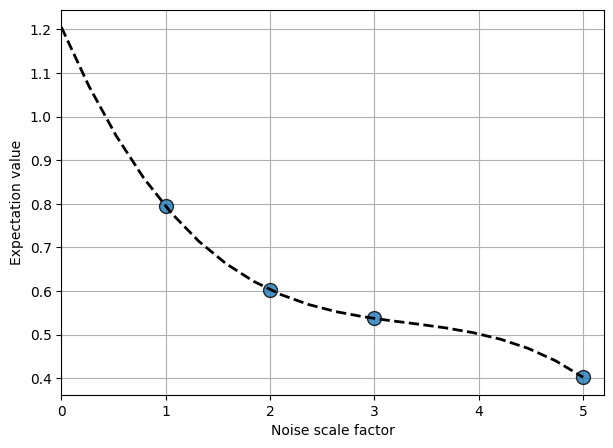

In [61]:
rf.plot_fit();

## Challenge 22: all encompassing

You're now ready to apply ZNE in your own (real) workflow!
Use everything you've learned thus far to apply ZNE with a custom observable, and extrapolation factory to a circuit of interest.
If you're running on a simulator, you'll have to make some considerations:

- What noise model will I use?
- What noise strength is realistic?

Running on a simulated noise model is often the best way to "practice" tuning the error mitigation strategy before taking it to hardware.
